### Try use ReLU

In [378]:
class BSReLUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(BSReLUModel, self).__init__()
        self.stack = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )
    def forward(self, inp):
        return self.stack(inp)

Because RelU is less non-linear than sigmoid, I use more hidden neurons here.

In [379]:
hidden_size_relu = 20

In [380]:
md_relu_0 = BSReLUModel(inp_size, hidden_size_relu, output_size)

In [381]:
optimizer_r_0 = optim.SGD(md_relu_0.parameters(), lr=0.01)

#### Train & test on dataset of normalized targets

In [382]:
loss_hist_relu_0 = trn_epoches(1000, md_relu_0,loss_fn, train_dataloader,optimizer_r_0)

epoch      0/  1000, loss: 0.760634
epoch    200/  1000, loss: 0.077181
epoch    400/  1000, loss: 0.078826
epoch    600/  1000, loss: 0.076021
epoch    800/  1000, loss: 0.071853


In [386]:
pred_relu_train_0 = test_loop(md_relu_0, train_x, train_y, loss_fn)

loss: 0.278742 



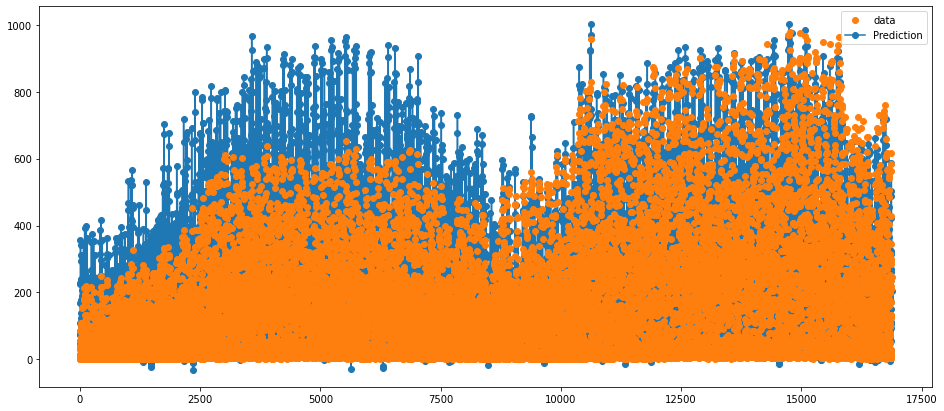

In [387]:
plt.figure(figsize = (16, 7))
pred_data = pred_relu_train_0.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(tgt_data_train, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [388]:
pred_relu_test_0 = test_loop(md_relu_0, test_x, test_y, loss_fn)

loss: 0.120043 



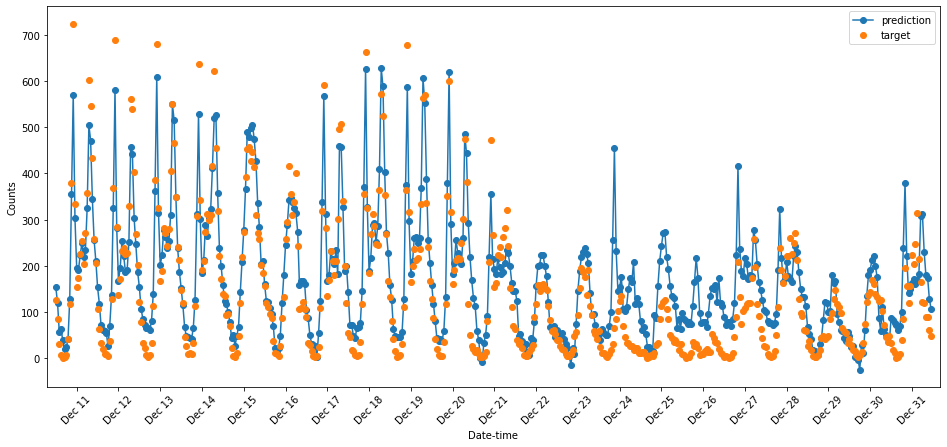

In [389]:
pred_data_test3 = pred_relu_test_0.numpy() * feature_statistics['cnt'][1] + feature_statistics['cnt'][0]

fig, ax = plt.subplots(figsize = (16, 7))
#x_data = df_inp[-21*24:].reset_index()['index']

ax.plot(pred_data_test3, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

test relu ok, then try relu on unnormalized target data.

#### Train & test on dataset of "un"normalized targets

In [403]:
md_relu_y0_0 = BSReLUModel(inp_size, hidden_size_relu, output_size)

In [404]:
optimizer_r_y0_0 = optim.SGD(md_relu_y0_0.parameters(), lr=0.001)

In [405]:
loss_hist_relu_y0_0 = trn_epoches(1000, md_relu_y0_0,loss_fn, train_dataloader_0, optimizer_r_y0_0)

epoch      0/  1000, loss: 32156.462891
epoch    200/  1000, loss: 2019.776123
epoch    400/  1000, loss: 1940.293701
epoch    600/  1000, loss: 1893.388550
epoch    800/  1000, loss: 1778.167236


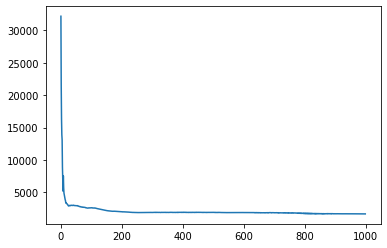

In [406]:
plt.plot(loss_hist_relu_y0_0)

In [407]:
pred_reluy0_train_0 = test_loop(md_relu_y0_0, train_x, train_y0, loss_fn)

loss: 9198.029297 



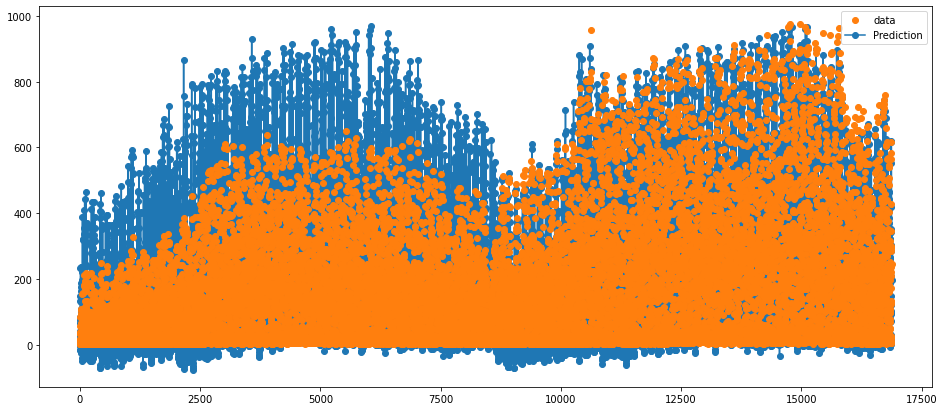

In [408]:
plt.figure(figsize = (16, 7))
pred_data = pred_reluy0_train_0.numpy()
pred_plot, = plt.plot(pred_data, 'o-')
cnt_plot, = plt.plot(train_y0, 'o')
plt.legend([cnt_plot, pred_plot],['data', 'Prediction'])
plt.show()

In [409]:
pred_reluy0_train_0 = test_loop(md_relu_y0_0, test_x, test_y0, loss_fn)

loss: 5508.974121 



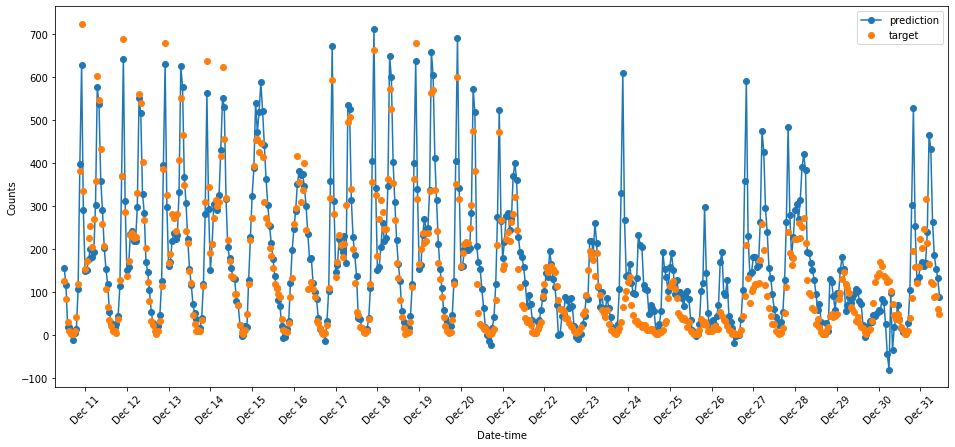

In [410]:
fig, ax = plt.subplots(figsize = (16, 7))

ax.plot(pred_reluy0_train_0, 'o-', label='prediction')
ax.plot(tgt_data_test, 'o', label='target')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')

dates = pd.to_datetime(df1.loc[df_inp[-21*24:].index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.margins(x=0.01)
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

The discreteness problem is now fixed, So the cause should be sigmoid's gradient vanishing.